# BY: Mohamed Ashraf Gaber

## The Data.
#### Daily Temperature of Major Cities.
#### Daily average temperature values recorded in major cities of the world.
#### I'll be using a part of this data set from kaggle from this <a href='https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities'>Link</a>
#### Here I'll do some Exploratory Data Analysis and some Data Visualization. <br> Then I'll predict the temperature for 2019 and 2020.
### NOTE :- The data is so big all over the world (2 Million) so now I'll use the temperature data for just Europe (350k).
### Importing libraries I'll need.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### Reading the data.

In [2]:
df = pd.read_csv('europe_temperature.csv')

df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Europe,Albania,NaN,Tirana,1,1,1995,-99.0
1,Europe,Albania,NaN,Tirana,1,2,1995,-99.0
2,Europe,Albania,NaN,Tirana,1,3,1995,-99.0
3,Europe,Albania,NaN,Tirana,1,4,1995,-99.0
4,Europe,Albania,NaN,Tirana,1,5,1995,-99.0


### Exploratory Data Analysis

In [3]:
df.describe()

,State,Month,Day,Year,AvgTemperature
count,0.0,381990.000000,381990.000000,381990.000000,381990.000000
mean,NaN,6.471363,15.717966,2005.255805,46.696285
std,NaN,3.457737,8.800558,50.696648,31.425646
min,NaN,1.000000,1.000000,200.000000,-99.000000
25%,NaN,3.000000,8.000000,2000.000000,39.700000
50%,NaN,6.000000,16.000000,2006.000000,51.900000
75%,NaN,9.000000,23.000000,2013.000000,62.700000
max,NaN,12.000000,31.000000,2020.000000,102.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381990 entries, 0 to 381989
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          381990 non-null  object 
 1   Country         381990 non-null  object 
 2   State           0 non-null       float64
 3   City            381990 non-null  object 
 4   Month           381990 non-null  int64  
 5   Day             381990 non-null  int64  
 6   Year            381990 non-null  int64  
 7   AvgTemperature  381990 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 23.3+ MB


#### Searching for Null values.

In [5]:
df.isnull().sum()

Region                 0
Country                0
State             381990
City                   0
Month                  0
Day                    0
Year                   0
AvgTemperature         0
dtype: int64

In [6]:
df.shape

(381990, 8)

#### Visualizing the Null values.

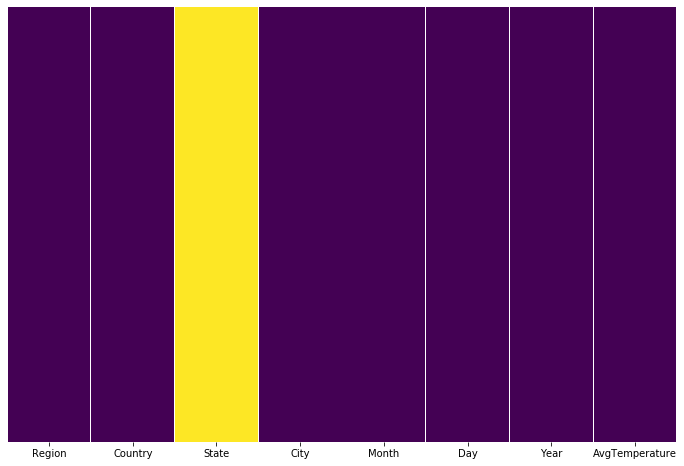

In [7]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### I'll drop the State column because its values are Null.

In [8]:
df.drop('State', axis=1, inplace=True)

df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Europe,Albania,Tirana,1,1,1995,-99.0
1,Europe,Albania,Tirana,1,2,1995,-99.0
2,Europe,Albania,Tirana,1,3,1995,-99.0
3,Europe,Albania,Tirana,1,4,1995,-99.0
4,Europe,Albania,Tirana,1,5,1995,-99.0


#### Now there aren't any Null values.

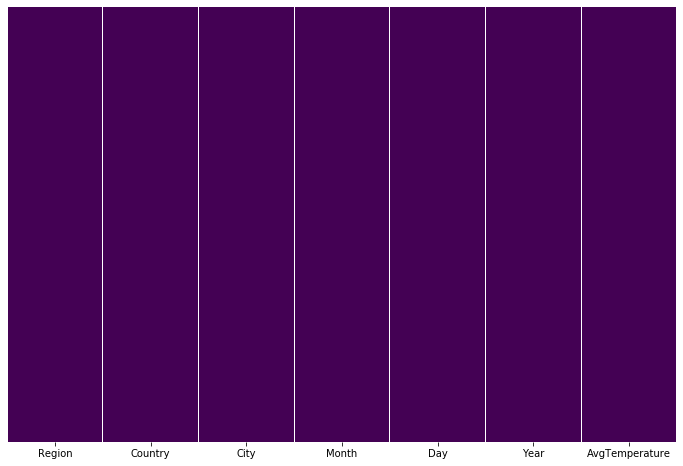

In [9]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df.shape

(381990, 7)

### Data Visualization.
#### Making countplot for categorical columns.

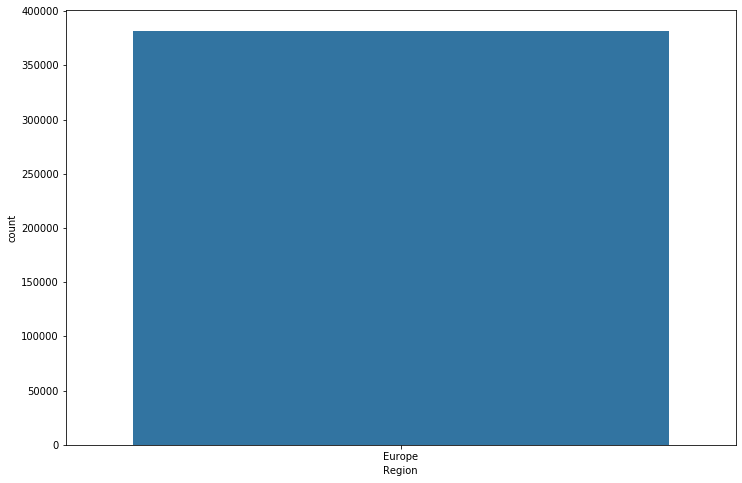

In [11]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Region', data=df)

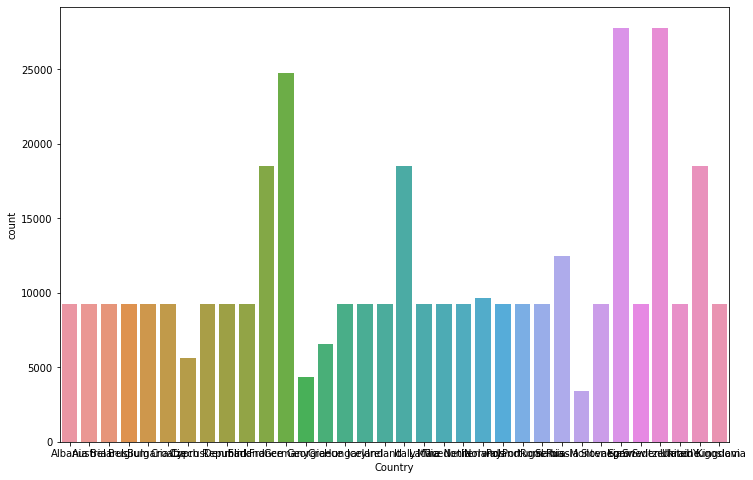

In [12]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Country', data=df)

In [13]:
df['Country'].unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Georgia', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Latvia', 'Macedonia', 'The Netherlands', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia-Montenegro',
       'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom', 'Yugoslavia'], dtype=object)

In [14]:
df['Country'].nunique()

34

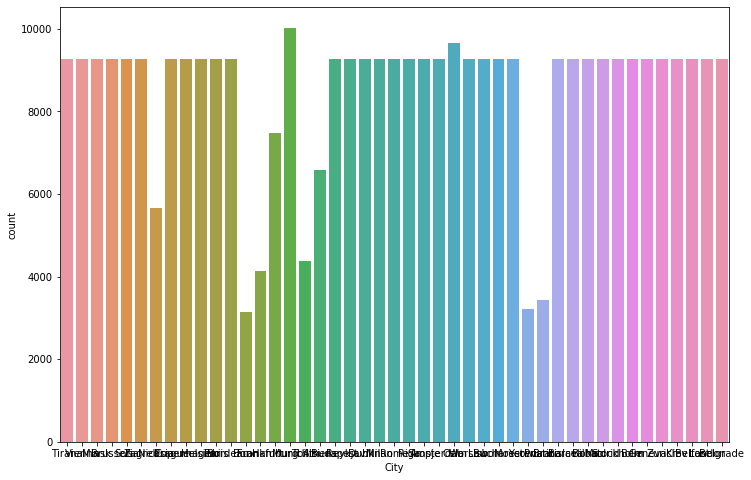

In [15]:
plt.figure(figsize=(12, 8))

sns.countplot(x='City', data=df)

In [16]:
df['City'].nunique()

45

#### Visualize the correlation between "AvgTemperature" columns and other numerical columns.

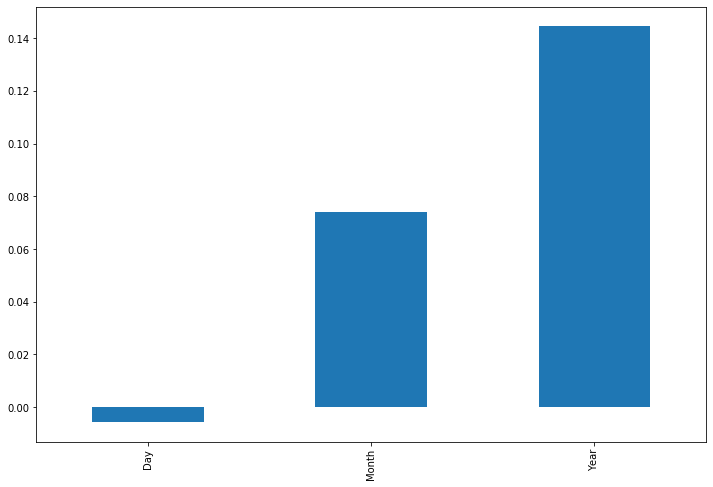

In [17]:
df.corr()['AvgTemperature'].sort_values()[:-1].plot(kind='bar', figsize=(12, 8))

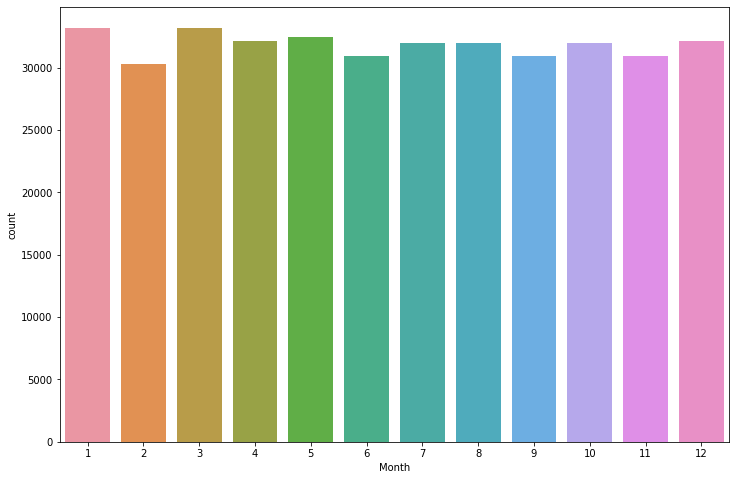

In [18]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Month', data=df)

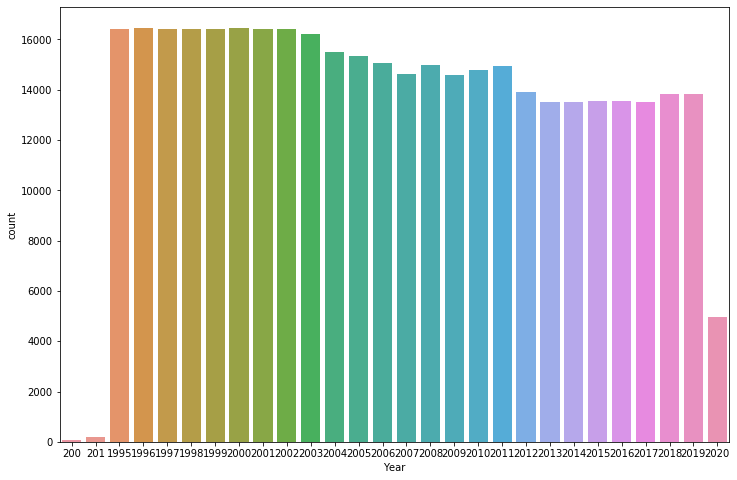

In [19]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Year', data=df)

#### I'll drop Years that are equal to 200 or 201.

In [20]:
df['Year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  200,  201], dtype=int64)

In [21]:
df[df['Year'] < 1995]

,Region,Country,City,Month,Day,Year,AvgTemperature
119990,Europe,Germany,Hamburg,12,3,200,-99.0
119991,Europe,Germany,Hamburg,12,4,200,-99.0
119992,Europe,Germany,Hamburg,12,5,200,-99.0
119993,Europe,Germany,Hamburg,12,6,200,-99.0
119994,Europe,Germany,Hamburg,12,7,200,-99.0
...,...,...,...,...,...,...,...
222558,Europe,Norway,Oslo,12,27,200,-99.0
222559,Europe,Norway,Oslo,12,28,200,-99.0
222560,Europe,Norway,Oslo,12,29,200,-99.0
222561,Europe,Norway,Oslo,12,30,200,-99.0


In [22]:
sum(df['Year'] < 1995)

295

In [23]:
df.drop(df.index[df['Year'] < 1995], inplace=True)

sum(df['Year'] < 1995)

0

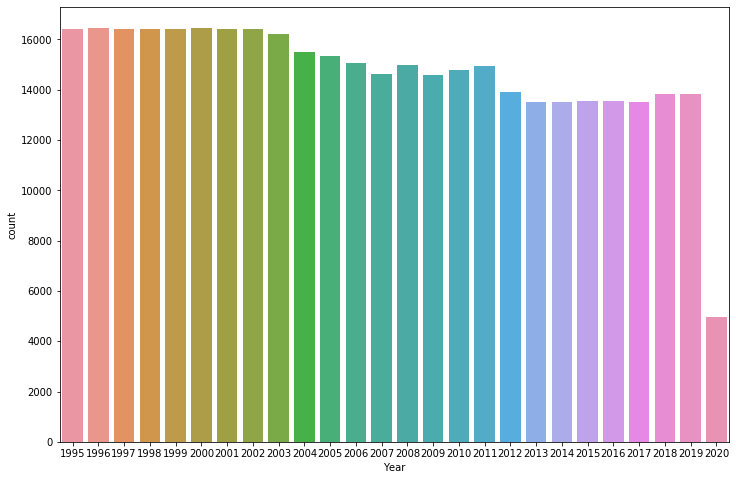

In [24]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Year', data=df)

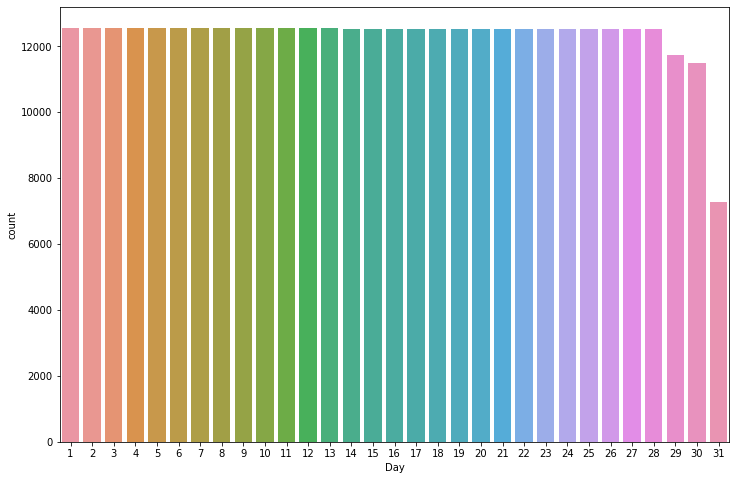

In [25]:
plt.figure(figsize=(12, 8))

sns.countplot(x='Day', data=df)

#### Creating a distplot for the "AvgTemperature" column.

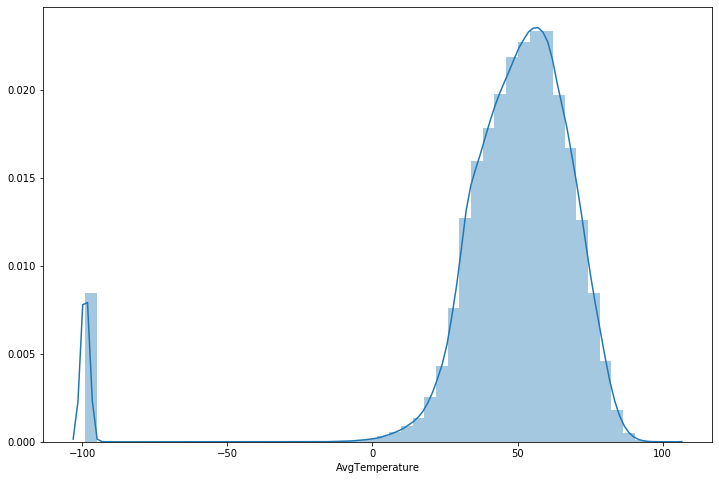

In [26]:
plt.figure(figsize=(12, 8))

sns.distplot(df['AvgTemperature'])

In [27]:
# Printing the length of the values for each month.
for month in np.arange(1, 13):
  print(f"Number of data in {month}.Month =", len(df[df['Month'] == month]))

Number of data in 1.Month = 33200
Number of data in 2.Month = 30274
Number of data in 3.Month = 33201
Number of data in 4.Month = 32128
Number of data in 5.Month = 32489
Number of data in 6.Month = 30951
Number of data in 7.Month = 31960
Number of data in 8.Month = 31930
Number of data in 9.Month = 30901
Number of data in 10.Month = 31930
Number of data in 11.Month = 30870
Number of data in 12.Month = 31861


#### I'll also drop the "AvgTemperature" values that are equal to -99.

In [28]:
sum(df['AvgTemperature'] == -99)

12993

In [29]:
df.drop(df.index[df['AvgTemperature'] == -99], inplace=True)

sum(df['AvgTemperature'] == -99)

0

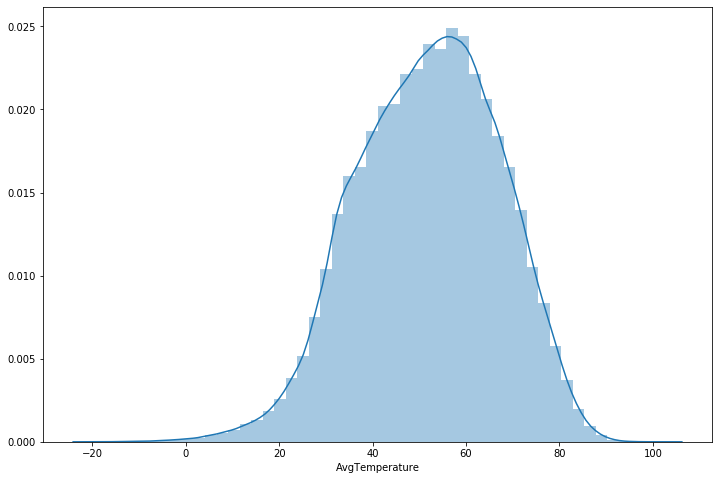

In [30]:
plt.figure(figsize=(12, 8))

sns.distplot(df['AvgTemperature'])

#### Here I'll visualize the average temperature for each month from 1995 to 2019

In [31]:
# This function take the month as a parameter and return a pandas Series.
# Containing the average temperature for this month from 1995 to 2019.
def month_avg(month):
  data = df[df['Month'] == month]  # Creating a new data frame for this month.
  avg_deg = data.groupby('Year')['AvgTemperature'].mean()  # Calculating the average temperature.
  return avg_deg

In [32]:
# This function take three months and a season as a parameters.
# It visualize the average temperature for this month from 1995 to 2019.
def plot(first, second, third, months, season):
  fig, axs = plt.subplots(3, figsize=(15, 10))  # Creating a subplots for the three months.
  fig.suptitle(f"European {season} Temperature Averages by Year", fontsize=15)  # Setting the title for the subplots.

  # This for the first month.
  axs[0].plot(first.axes[0], first, 'o-', color='#0099FF')  # It plots the year on x axis and the values on y axis.
  axs[0].grid(color='red', linestyle='dotted', linewidth=1)  # Setting the color of grid to red, line style to dotted and linewidth to 1.
  axs[0].set_title(f'{months[0]}. Month')  # Setting title for each plot.
  axs[0].set_xlabel('Year')  # Setting x label to Year.
  axs[0].set_ylabel('Average Temperature')  # Setting y label to Average Temperature.

  # This for the second month.
  # The same as above.
  axs[1].plot(second.axes[0], second, 'o-', color='#00CC66')
  axs[1].grid(color='red', linestyle='dotted', linewidth=1)
  axs[1].set_title(f'{months[1]}. Month')
  axs[1].set_xlabel('Year')
  axs[1].set_ylabel('Average Temperature')

  # This for the third month.
  # The same as above.
  axs[2].plot(third.axes[0], third, 'o-', color='#FF9900')
  axs[2].grid(color='red', linestyle='dotted', linewidth=1)
  axs[2].set_title(f'{months[2]}. Month')
  axs[2].set_xlabel('Year')
  axs[2].set_ylabel('Average Temperature')

  # This loop making one y label for all subplots.
  for ax in axs.flat:
    ax.label_outer()

#### First, Visualizing the Summer season.

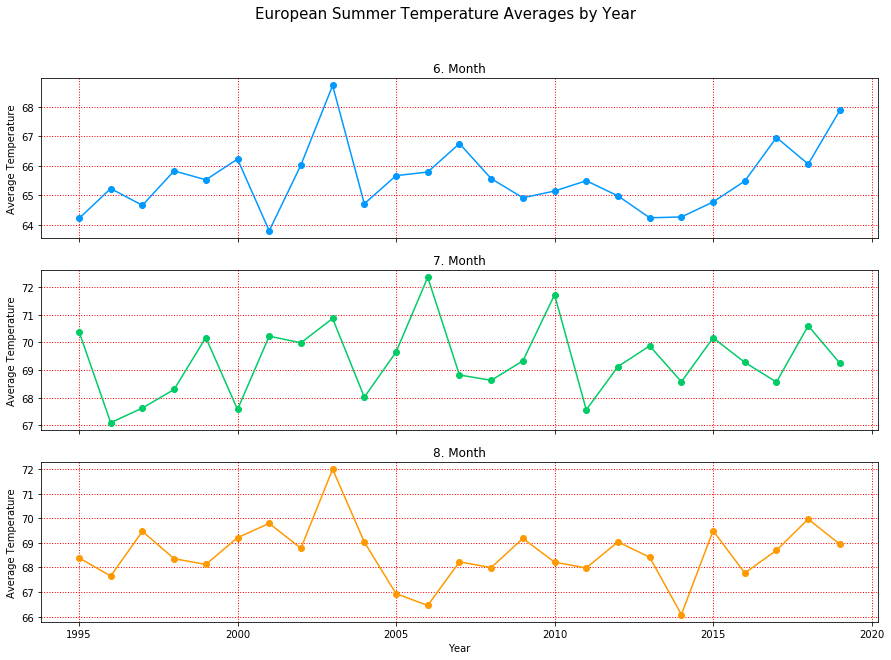

In [33]:
season = 'Summer'
months = [6, 7, 8]

first_month = month_avg(months[0])
second_month = month_avg(months[1])
third_month = month_avg(months[2])

plot(first_month, second_month, third_month, months, season)

#### Second, Visualizing the Autumn season.

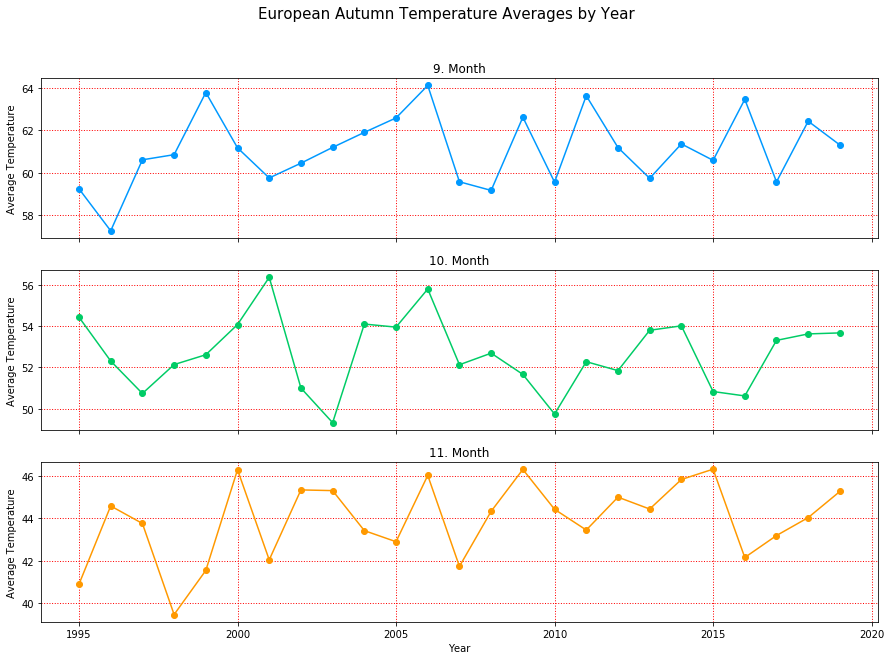

In [34]:
season = 'Autumn'
months = [9, 10, 11]

first_month = month_avg(months[0])
second_month = month_avg(months[1])
third_month = month_avg(months[2])

plot(first_month, second_month, third_month, months, season)

#### Third, Visualizing the Winter season.

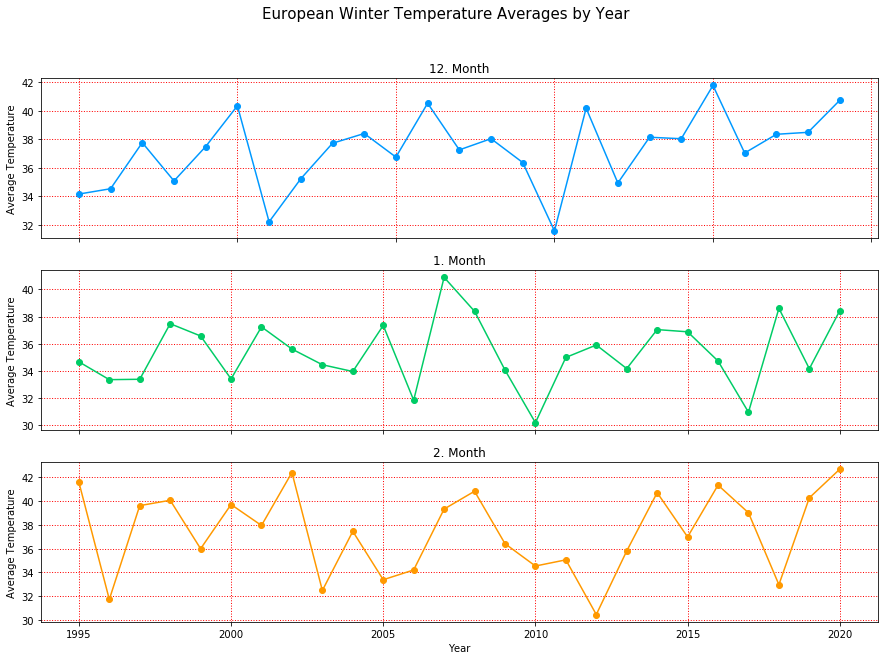

In [35]:
season = 'Winter'
months = [12, 1, 2]

first_month = month_avg(months[0])
second_month = month_avg(months[1])
third_month = month_avg(months[2])

plot(first_month, second_month, third_month, months, season)

#### Fourth, Visualizing the Spring season.

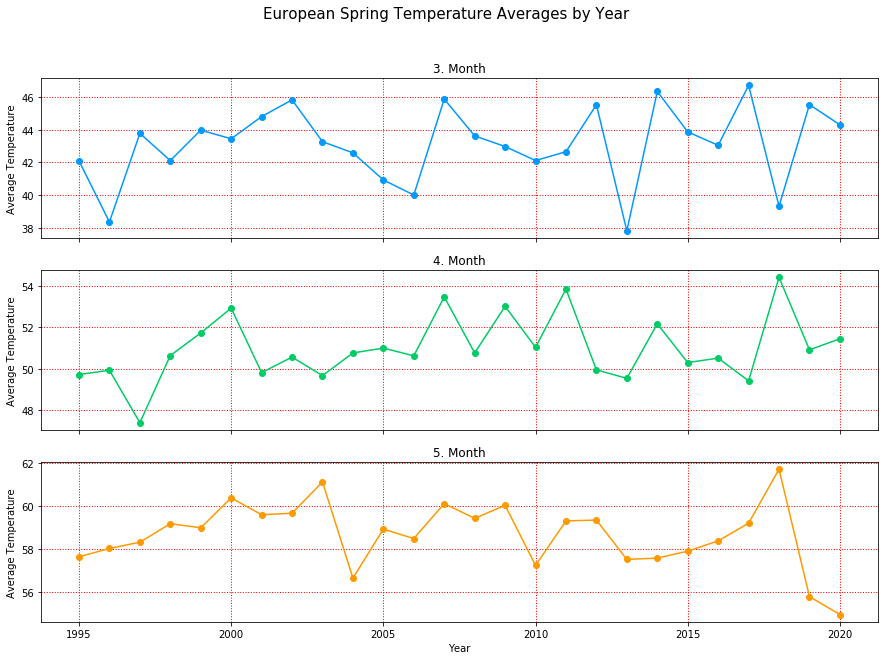

In [36]:
season = 'Spring'
months = [3, 4, 5]

first_month = month_avg(months[0])
second_month = month_avg(months[1])
third_month = month_avg(months[2])

plot(first_month, second_month, third_month, months, season)

#### Visualizing The average temperature for Europe by Year.

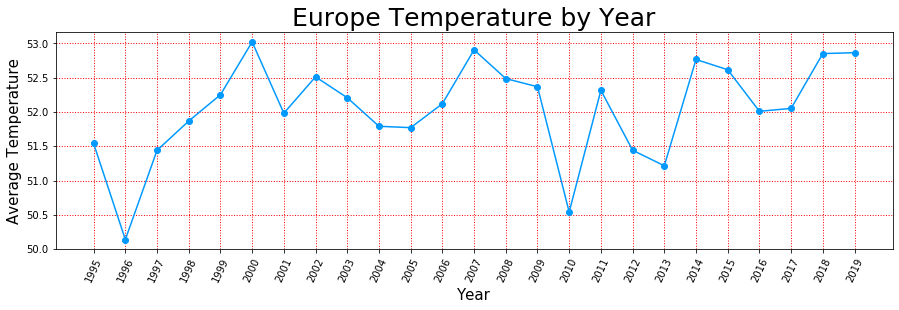

In [37]:
plt.figure(figsize=(15, 4))

avg_temp = df[df['Year'] < 2020].groupby('Year')['AvgTemperature'].mean()

plt.plot(avg_temp.axes[0], avg_temp, 'o-', color='#0099FF')
plt.grid(color='red', linestyle='dotted', linewidth=1)

plt.xticks(avg_temp.axes[0], rotation=65)

plt.title('Europe Temperature by Year', fontsize=25)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Temperature', fontsize=15)

plt.show()

In [38]:
df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
841,Europe,Albania,Tirana,4,21,1997,55.4
845,Europe,Albania,Tirana,4,25,1997,56.8
846,Europe,Albania,Tirana,4,26,1997,61.5
847,Europe,Albania,Tirana,4,27,1997,60.8
848,Europe,Albania,Tirana,4,28,1997,57.2


### Dealing with categorical features.
#### By using one hot encoding technique.

In [39]:
country = pd.get_dummies(df['Country'], drop_first=True)  # Getting the dummies values for "Country" feature and drop the first.
city = pd.get_dummies(df['City'], drop_first=True)  # Getting the dummies values for "City" feature and drop the first.

# Concatenating the new two columns with the dataset and dropping the old two columns.
# Also dropping the "Region" column because it's just Europe
df = pd.concat([df.drop(['Region', 'Country', 'City'], axis=1), country, city], axis=1)

df.head()

,Month,Day,Year,AvgTemperature,Austria,Belarus,Belgium,Bulgaria,Croatia,Cyprus,...,Skopje,Sofia,Stockholm,Tbilisi,Tirana,Vienna,Warsaw,Yerevan,Zagreb,Zurich
841,4,21,1997,55.4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
845,4,25,1997,56.8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
846,4,26,1997,61.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
847,4,27,1997,60.8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
848,4,28,1997,57.2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Creating training data and test data. <br> The train data will have all the data set until 2018. The test data will have from 2019 to 2020

In [40]:
X_train = df.drop('AvgTemperature', axis=1)[df['Year'] < 2019].values
y_train = df[df['Year'] < 2019]['AvgTemperature'].values

X_test = df.drop('AvgTemperature', axis=1)[df['Year'] > 2018].values
y_test = df[df['Year'] > 2018]['AvgTemperature'].values

#### Scaling the data.

In [41]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Creating the first model from XGBRegressor.
#### The mean absolute error is 8.7.
#### I'll try using Sequential API.

In [42]:
model = XGBRegressor(n_estimators=20, random_state=42, max_depth = 3)

model.fit(X_train, y_train)

print(mean_absolute_error(y_test, model.predict(X_test)))

[07:47:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
8.753755261616108


In [43]:
X_train.shape

(350216, 80)

#### Creating a model from Sequetial.

In [44]:
model = Sequential()

model.add(Dense(80, activation='relu'))  # The input layer will have 80 neurons and relu as an activation funcion.

model.add(Dense(50, activation='relu'))  # The first hidden layer will have 50 neurons and relu as an activation funcion.
model.add(Dense(25, activation='relu'))  # The second hidden layer will have 25 neurons and relu as an activation funcion.
model.add(Dense(10, activation='relu'))  # The third hidden layer will have 10 neurons and relu as an activation funcion.

model.add(Dense(1))  # The output layer will have single neuron.

# The loss will be Mean Absolute Error and the optimizer will be adam.
model.compile(loss='mse', optimizer='adam')

In [45]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=15)  # Creating Early stopping to prevent overfitting.

### Fitting the model.

In [46]:
# Fitting the model, setting the validation data to test set, batch size to 128 and epochs to 100 maximum. 
model.fit(x=X_train, y=y_train, batch_size=128,
          validation_data=(X_test, y_test), epochs=100, verbose=1,
          callbacks=[early])

Train on 350216 samples, validate on 18486 samples
Epoch 1/100
350216/350216 [==============================] - 4s 13us/sample - loss: 187.4619 - val_loss: 41.8448
Epoch 2/100
350216/350216 [==============================] - 4s 11us/sample - loss: 41.7500 - val_loss: 36.8852
Epoch 3/100
350216/350216 [==============================] - 4s 11us/sample - loss: 41.0657 - val_loss: 37.1960
Epoch 4/100
350216/350216 [==============================] - 4s 11us/sample - loss: 40.7412 - val_loss: 37.4818
Epoch 5/100
350216/350216 [==============================] - 4s 11us/sample - loss: 40.6087 - val_loss: 38.5912
Epoch 6/100
350216/350216 [==============================] - 4s 11us/sample - loss: 40.3265 - val_loss: 39.6097
Epoch 7/100
350216/350216 [==============================] - 4s 11us/sample - loss: 40.2923 - val_loss: 36.6381
Epoch 8/100
350216/350216 [==============================] - 4s 11us/sample - loss: 40.1258 - val_loss: 36.8907
Epoch 9/100
350216/350216 [=========================

#### Visualizing the losses.

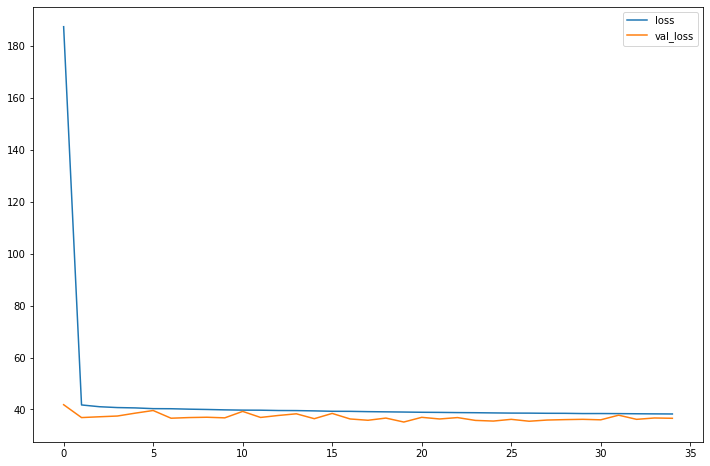

In [47]:
losses = pd.DataFrame(model.history.history)

losses.plot(figsize=(12, 8))

#### The mean absolute error for this model is 4.8. And the mean absolute error for the "AvgTemperature" is 51.9 Great.

In [48]:
pred = model.predict(X_test)

print(mean_absolute_error(y_test, pred))

4.822225075548092


In [49]:
print(df['AvgTemperature'].mean())

51.94717142841652
